In [1]:
import pixie2
import batch_pixie
from os import listdir
from os.path import isfile, join
import shelve, multiprocessing, datetime, time
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl


In [ ]:
#Generate template file
foldername = 'Radon'

fnamelist = [join(foldername,f) for f in sorted(listdir(foldername))
        if isfile(join(foldername, f)) if ('.to' in f)&(not 'npy' in f)&(not
        'shelf' in f)]
        
pixie2.make1PEtemplate(fnamelist,'singlePEtemplate_Radon.shelf', 
                       ToTcuts={0:(2,4),1:(2,4),2:(2,5),3:(2,4), 4:(2,4),5:(2,4),6:(2,4),7:(2,4),8:(2,4)},
                       resamplefactor=10, alignidx=(110,180), BLslice=slice(10,100), 
                       medianlen=21, highfreqcut=200, thresh=6, Nsamp_dig=500, debug=True)

batch_pixie.procwfms('Radon', redoanal=True)

In [2]:
#Load template file
foldernames = [r'D:\Downloads\ANU\2021 Winter\SCNC2101\Daniel\Radon']
#foldernames = [r'D:\Downloads\ANU\2021 Winter\SCNC2101\Test\Radon']
shelffiles = [os.path.join(foldername, os.path.splitext(f)[0])
             for foldername in foldernames 
              for f in sorted(listdir(foldername))
             if os.path.isfile(os.path.join(foldername, f))
             if 'shelf.bak' in f]
shelf_keys = [os.path.splitext(item)[0] for item in shelffiles]
analysisdict_list = []
for i in range(len(shelffiles)):
    analysisdict_list.append(shelve.open(shelffiles[i])['anal'])
print(dir(analysisdict_list[0]))

['BL', 'BLslice', 'BeamCh', 'CFD', 'CFDBaF2', 'CFDBeam', 'CFDkwargs', 'Nread', 'Nsamp', 'Ntrigs', 'Nwfms', 'NwfmsPerChunk', 'PEtemplate', 'PEtemplatekwargs', 'QToT', 'Qf', 'Qkwargs', 'Qt', 'ToT', 'ToTkwargs', 'WfmsInMemory', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'abstime', 'abstimeBaF2', 'abstimeBeam', 'arrayify', 'ch', 'chunkall', 'coinclvl', 'coincmask', 'coincsuffix', 'crapCFDkwargs', 'downscalefactor', 'extramask', 'filtwfm', 'fnamelist', 'goodCFD', 'idlecpus', 'ncoinc', 'parallel', 'procChunk', 'secondlevelcuts', 'self', 'storewfmproc', 'templatefile', 'timingmask', 'wfiltkwargs', 'wfm', 'writerets']


In [3]:
#Experiment runtime in seconds
print((max(10*analysisdict_list[-1].abstime[shelffiles[-1][45:-6]]\
       +2*analysisdict_list[-1].CFD[shelffiles[-1][45:-6]])*1e-9
      -min(10*analysisdict_list[0].abstime[shelffiles[0][45:-6]]\
       +2*analysisdict_list[0].CFD[shelffiles[0][45:-6]])*1e-9))

515926.4283622776


In [4]:
analysisdict_list[-1].Qkwargs

{'fastint': 15, 'totint': 1000}

[]
beta recoils: 156449
n coincidence: 156460
[99695.01953125 61950.25      ]
beta recoils: 130103
n coincidence: 130126
[]
beta recoils: 124399
n coincidence: 124412
[95648.640625]
beta recoils: 125764
n coincidence: 125787
[]
beta recoils: 127938
n coincidence: 127949
[]
beta recoils: 132686
n coincidence: 132715
[63371.078125]
beta recoils: 133622
n coincidence: 133643
[47631.4375]
beta recoils: 130962
n coincidence: 130979
[]
beta recoils: 131785
n coincidence: 131806
[]
beta recoils: 152657
n coincidence: 152680
[]
beta recoils: 199654
n coincidence: 199691
[]
beta recoils: 166488
n coincidence: 166521
[81553.375]
beta recoils: 156882
n coincidence: 156907
[33724.5]
beta recoils: 160120
n coincidence: 160161
[]
beta recoils: 307585
n coincidence: 307628
[130731.6875  73529.9375  29046.3125]
beta recoils: 347507
n coincidence: 347580
[ 43324.5    103685.9375 104787.6875 158847.8125]
beta recoils: 346146
n coincidence: 346189
Channel 0 counts: 5044168 Channel 1 counts: 29297873
alph

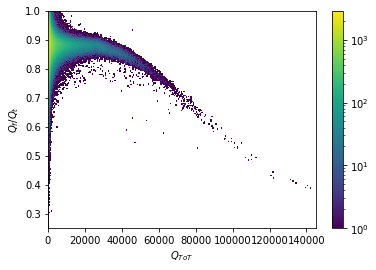

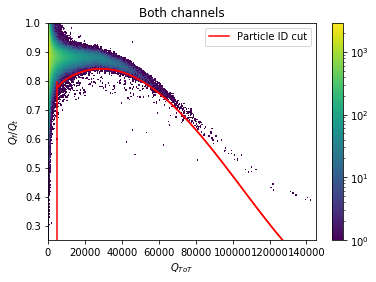

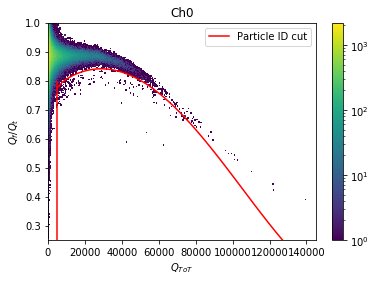

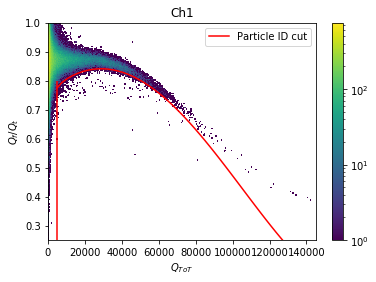

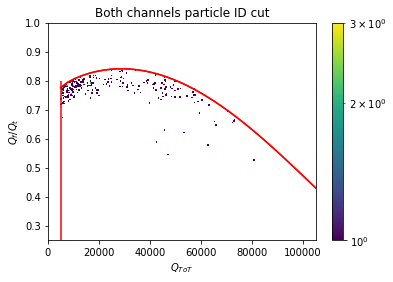

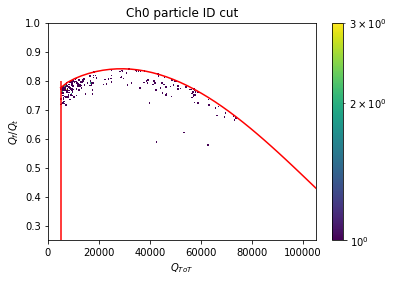

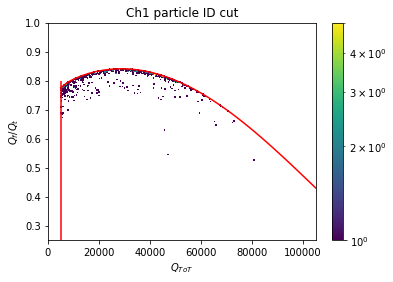

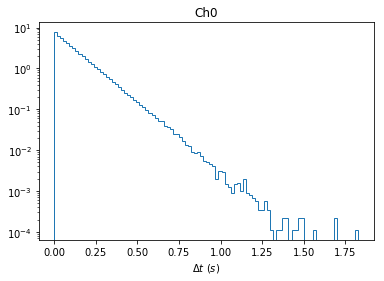

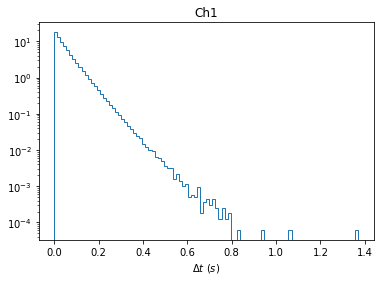

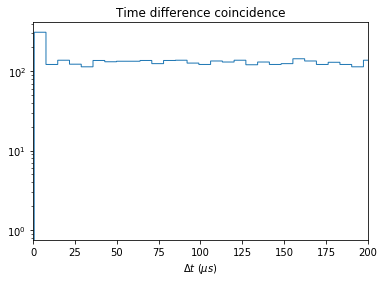

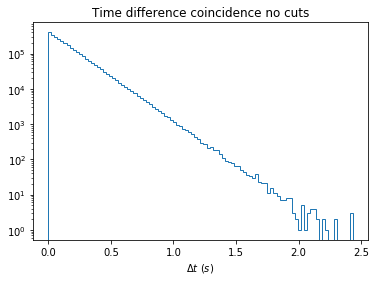

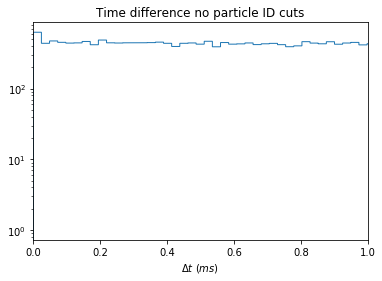

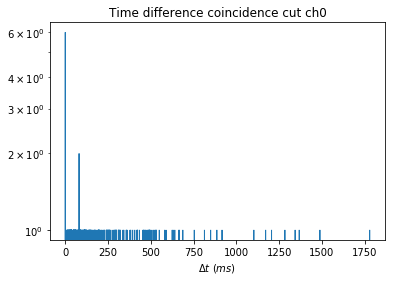

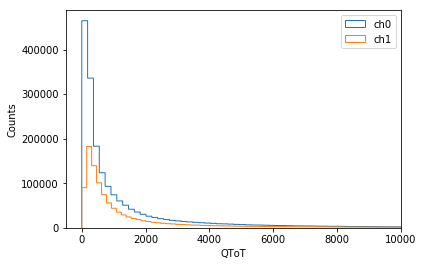

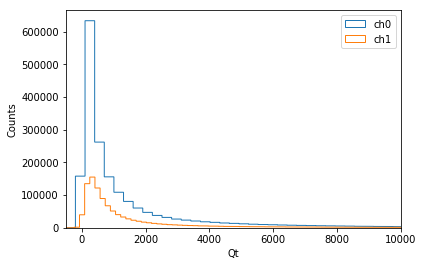

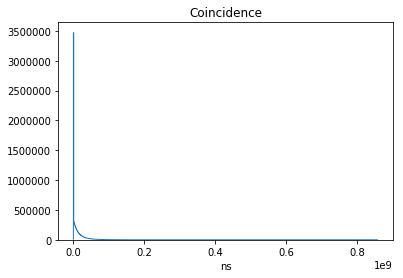

In [5]:
n_ch0 = 0
n_ch1 = 0
count = 0
Qf_Qt_ub = 0.8
Qf_Qt_lb = 0
QToT_ub = 140000
QToT_lb = 5000

dt_ub = 200e-6
dt_lb = 0

Qt_ch0_list = []
Qt_ch1_list = []

QToT_ch0_list = []
QToT_ch1_list = []

QToT_filtered_all = []
QToT_ch0_filtered_all = []
QToT_ch1_filtered_all = []

QToT_alpha200_all = []
QToT_beta200_all = []
QToT_alpha1000_all = []
QToT_beta1000_all = []

Qf_Qt_ch0_all = []
Qf_Qt_ch1_all= []

Qf_Qt_filtered_all = []
Qf_Qt_ch0_filtered_all = []
Qf_Qt_ch1_filtered_all = []

QToT_all = []
QToT_b_all = []
Qf_Qt_all = []

dt_both_all = []

time_coin_all = []
time_diff_cut_all =[]
time_b_a_all = []
abstime_alpha_all = []
abstime_beta_all= []
abstime_beta2_all = []
time_bb_all = []
abstime_a_b_all = []
abstime_alpha_1ms_all = []
abstime_beta_1ms_all = []
abstime_alpha_cut_all = []
abstime_alpha_notimecut = []

count_b_a = 0
count_b_a_2 = 0

#Particle ID cut curve functions
def make_cut(QToT,ch_coincidence):
    #filter_ch0 = lambda x:(0.85-1e-10*(x-28000)**2)-(5e5/x**2)+7e-12*x**2
    #filter_ch1 = lambda x:(0.83-1e-10*(x-28000)**2)-(5e5/x**2)+7e-12*x**2
    #filter_ch0 = lambda x:(0.85-1e-10*(x-26000)**2)-(3e5/x**2)+9e-12*x**2
    #filter_ch1 = lambda x:(0.84-1e-10*(x-28000)**2)-(3e5/x**2)+5e-12*x**2
    filter_ch0 = lambda x:(0.84-1e-10*(x-28000)**2)-(3e5/x**2)+150e-23*x**4
    filter_ch1 = lambda x:(0.84-1e-10*(x-28000)**2)-(3e5/x**2)+150e-23*x**4
    return ch_coincidence*filter_ch1(QToT) + (1-ch_coincidence)*filter_ch0(QToT)

def make_cut0(QToT):
    #filter_ch0 = lambda x:(0.85-1e-10*(x-28000)**2)-(5e5/x**2)+7e-12*x**2
    #filter_ch0 = lambda x:(0.85-1e-10*(x-26000)**2)-(3e5/x**2)+9e-12*x**2
    filter_ch0 = lambda x:(0.84-1e-10*(x-28000)**2)-(3e5/x**2)+150e-23*x**4
    return filter_ch0(QToT)

def make_cut1(QToT):
    #filter_ch1 = lambda x:(0.83-1e-10*(x-28000)**2)-(5e5/x**2)+7e-12*x**2
    #filter_ch1 = lambda x:(0.84-1e-10*(x-28000)**2)-(3e5/x**2)+5e-12*x**2
    filter_ch1 = lambda x:(0.84-1e-10*(x-28000)**2)-(3e5/x**2)+150e-23*x**4
    return filter_ch1(QToT)


for i in range(len(analysisdict_list)):
    index_name = shelffiles[i][45:-6]
    #index_name = shelffiles[i][43:-6]
    ch0 = analysisdict_list[i].ch[index_name] == 0
    ch1 = analysisdict_list[i].ch[index_name] == 1
    #time in seconds
    time_ch0 = (10*analysisdict_list[i].abstime[index_name][ch0]+2*analysisdict_list[i].CFD[index_name][ch0])*1e-9
    time_ch1 = (10*analysisdict_list[i].abstime[index_name][ch1]+2*analysisdict_list[i].CFD[index_name][ch1])*1e-9
    #time_ch0 = (10*analysisdict_list[i].abstime[index_name][ch0]\
    #            +2*pixie2.crapCFD(analysisdict_list[i].wfm[index_name])[ch0])*1e-9
    #time_ch1 = (10*analysisdict_list[i].abstime[index_name][ch1]\
    #            +2*pixie2.crapCFD(analysisdict_list[i].wfm[index_name])[ch1])*1e-9
    
    n_ch0 += len(time_ch0)
    n_ch1 += len(time_ch1)
    
    dt_ch0 = time_ch0[1:]-time_ch0[:-1]
    dt_ch1 = time_ch1[1:]-time_ch1[:-1]
    
    #Index Coincidence
    time_both = 10*analysisdict_list[i].abstime[index_name]+2*analysisdict_list[i].CFD[index_name]
    #time_both = 10*analysisdict_list[i].abstime[index_name]+2*pixie2.crapCFD(analysisdict_list[i].wfm[index_name])
    
    index_ch = analysisdict_list[i].ch[index_name]
    dt_both = np.abs(time_both[1:]-time_both[:-1])
    #for i in range(1,len(time_both)-1):
    #    if time_both[i+1] - time_both[i] < 30:
    #        print(time_both[i+1] - time_both[i],time_both[i]-time_both[i-1])
    #print(dt_both[dt_both<30])
        
    index_ch_diff = index_ch[1:] + index_ch[:-1]
    
    dt_both_all += list(dt_both[index_ch_diff == 1])
    #print(np.max(dt_both))
    index_coincidence =  (dt_both < 10) & (index_ch_diff == 1)
    #print(np.sum(np.ones(len(index_coincidence))[index_coincidence]))
    
    #Qf_Qt
    Qf_Qt_ch0 = analysisdict_list[i].Qf[index_name][:-1][index_coincidence][ch0[:-1][index_coincidence]]\
                /analysisdict_list[i].Qt[index_name][:-1][index_coincidence][ch0[:-1][index_coincidence]]
    Qf_Qt_ch1 = analysisdict_list[i].Qf[index_name][:-1][index_coincidence][ch1[:-1][index_coincidence]]\
                /analysisdict_list[i].Qt[index_name][:-1][index_coincidence][ch1[:-1][index_coincidence]]
    Qf_Qt = analysisdict_list[i].Qf[index_name][:-1][index_coincidence]\
            /analysisdict_list[i].Qt[index_name][:-1][index_coincidence]
    Qf_Qt2 = analysisdict_list[i].Qf[index_name][1:][index_coincidence]\
            /analysisdict_list[i].Qt[index_name][1:][index_coincidence]
    
    Qf_Qt_all += list(Qf_Qt)
    Qf_Qt_ch0_all += list(Qf_Qt_ch0)
    Qf_Qt_ch1_all += list(Qf_Qt_ch1)
    

    #QToT
    QToT_ch0 = analysisdict_list[i].QToT[index_name][:-1][index_coincidence][ch0[:-1][index_coincidence]]
    QToT_ch1 = analysisdict_list[i].QToT[index_name][:-1][index_coincidence][ch1[:-1][index_coincidence]]
    QToT = analysisdict_list[i].QToT[index_name][:-1][index_coincidence]
    QToT2 = analysisdict_list[i].QToT[index_name][1:][index_coincidence]
    
    QToT_all += list(QToT)
    
    QToT_ch0_list += list(QToT_ch0)
    QToT_ch1_list += list(QToT_ch1)
    
    
    #Qt
    Qt_ch0 = analysisdict_list[i].Qt[index_name][:-1][index_coincidence][ch0[:-1][index_coincidence]]
    Qt_ch1 = analysisdict_list[i].Qt[index_name][:-1][index_coincidence][ch1[:-1][index_coincidence]]

    Qt_ch0_list += list(Qt_ch0)
    Qt_ch1_list += list(Qt_ch1)
    
    #Make cuts 
    ch_coincidence = analysisdict_list[i].ch[index_name][:-1][index_coincidence]
    ch_coincidence2 = analysisdict_list[i].ch[index_name][1:][index_coincidence]
       
    #Filter satisfied in both channels
    bool_filter_temp1 = (Qf_Qt < make_cut(QToT,ch_coincidence)) & (Qf_Qt > Qf_Qt_lb)\
    & (QToT < QToT_ub) & (QToT > QToT_lb)  
    bool_filter_temp2 = (Qf_Qt2 < make_cut(QToT2,ch_coincidence2)) & (Qf_Qt2 > Qf_Qt_lb)\
    & (QToT2 < QToT_ub) & (QToT2 > QToT_lb)  
    bool_filter = bool_filter_temp1 & bool_filter_temp2
    
    #Filter for ch0 and ch1
    bool_filter0 = (Qf_Qt_ch0 < make_cut0(QToT_ch0)) & (Qf_Qt_ch0 > Qf_Qt_lb)\
    & (QToT_ch0 < QToT_ub) & (QToT_ch0 > QToT_lb)  

    bool_filter1 = (Qf_Qt_ch1 < make_cut1(QToT_ch1)) & (Qf_Qt_ch1 > Qf_Qt_lb)\
    & (QToT_ch1 < QToT_ub) & (QToT_ch1 > QToT_lb)  
    
    #Store Qf_Qt for all files into one array
    Qf_Qt_filtered_all += list(Qf_Qt[bool_filter])
    Qf_Qt_ch0_filtered_all += list(Qf_Qt_ch0[bool_filter0])
    Qf_Qt_ch1_filtered_all += list(Qf_Qt_ch1[bool_filter1])
    
    #Store QToT
    QToT_filtered_all += list(QToT[bool_filter])
    QToT_ch0_filtered_all += list(QToT_ch0[bool_filter0])
    QToT_ch1_filtered_all += list(QToT_ch1[bool_filter1])
    
    #QToT of beta that comes right before the alpha
    QToT_b_all += list(QToT[:-1][bool_filter[1:]])
    
    #Pulse time cut
    time_coincidence = time_both[:-1][index_coincidence]
    time_filtered = time_coincidence[bool_filter]
    
    abstime_alpha_cut_all += list(time_filtered)
    
    #for i in range(len(time_coincidence)-1):
    #    if time_coincidence[i+1] - time_coincidence[i] < 0:
    #        print("Consectutive time decrease")
    
    
    #print(np.min((time_filtered[1:]-time_filtered[:-1])*1e-3))
    #time_cut_index = time_filtered[1:]-time_filtered[:-1]<200000
    
    #Time for beta then alpha
    time_cut_index = (time_filtered-time_coincidence[:-1][bool_filter[1:]])<200000
    print((time_filtered-time_coincidence[:-1][bool_filter[1:]])[time_cut_index])
    #Abstime of alphas
    abstime_alpha_all += list(time_filtered[time_cut_index])
    abstime_alpha_notimecut += list(time_filtered)
    abstime_beta_all += list(time_coincidence[:-1][bool_filter[1:]][time_cut_index])
    #Beta after alpha
    abstime_beta2_all += list(time_coincidence[1:][bool_filter[:-1]][time_cut_index])
    abstime_a_b_all += list(time_coincidence[1:][bool_filter[:-1]]-time_filtered)
    
    #QToT 0 to 200us beta then alpha
    QToT_alpha200_all += list(QToT[bool_filter][time_cut_index])
    QToT_beta200_all += list(QToT[:-1][bool_filter[1:]][time_cut_index])
    
    #500-1000us beta then alpha
    time_cut_index1000 = (500000 < (time_filtered-time_coincidence[:-1][bool_filter[1:]])) *\
    ((time_filtered-time_coincidence[:-1][bool_filter[1:]])<1000000)
    QToT_alpha1000_all += list(QToT[bool_filter][time_cut_index1000])
    QToT_beta1000_all += list(QToT[:-1][bool_filter[1:]][time_cut_index1000])
    
    #Time for beta then alpha 1ms
    time_cut_index_1ms = (time_filtered-time_coincidence[:-1][bool_filter[1:]]) <1000000
    #Abstime of alphas
    abstime_alpha_1ms_all += list(time_filtered[time_cut_index_1ms])
    abstime_beta_1ms_all += list(time_coincidence[:-1][bool_filter[1:]][time_cut_index_1ms])
    
    
    count += np.sum(np.ones(len(time_cut_index))[time_cut_index])
    
    time_b_a_all += list(time_filtered-time_coincidence[:-1][bool_filter[1:]])
    
    for i in range(len(bool_filter)-1):
        if bool_filter[i] == True & bool_filter[i+1] == True:
            print("Consectutive Alphas")
    
    #beta then beta electron recoil
    b = time_coincidence[1:][np.logical_not(bool_filter)[:-1]]-time_coincidence[:-1][np.logical_not(bool_filter)[1:]]
    
    print("beta recoils: "+ str(len(b[b!=0])))
    print("n coincidence: "+ str(len(time_coincidence)))
    time_bb_all += list(b[b!=0])
    
    #Store all time differences between consecutive events (regardless of alpha/beta)
    time_coin_all += list(time_coincidence[1:]-time_coincidence[:-1])
    
    
    time_diff_cut_all += list(time_coincidence[ch0[:-1][index_coincidence]][1:][bool_filter0[:-1]]\
          -time_coincidence[ch0[:-1][index_coincidence]][bool_filter0])
    
    #Alpha counts without 164us time cut
    count_b_a += (len(time_coincidence)-len(b[b!=0])-1)/2
    count_b_a_2 += len(time_filtered)
    
    #dt_cut = time_both[1:][index_coincidence][bool_filter]-time_both[:-1][index_coincidence][bool_filter]
print("Channel 0 counts: "+str(n_ch0)+" Channel 1 counts: " + str(n_ch1))
print("alpha count from beta: "+str(count_b_a))
print("alpha count from particle ID cut: " +str(count_b_a_2))
print("Particle ID and time cut count: "+str(count))


#Plot Qf/Qt vs QToT
plt.hist2d(QToT_all, Qf_Qt_all, 
                norm=mpl.colors.LogNorm(), bins=(1000,1000), range=((0,200000), (0,2)));
plt.colorbar()
plt.ylabel(r'$Q_f/Q_{t}$')
plt.xlabel(r'$Q_{ToT}$')
plt.ylim(0.25,1)
plt.xlim(0,145000)
plt.show()


plt.hist2d(QToT_all, Qf_Qt_all, 
                norm=mpl.colors.LogNorm(), bins=(1000,1000), range=((0,200000), (0,2)));
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut0(np.linspace(QToT_lb,QToT_ub)),'r')
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut1(np.linspace(QToT_lb,QToT_ub)),'r',label='Particle ID cut')
plt.vlines(QToT_lb,Qf_Qt_lb,Qf_Qt_ub,'r')
#plt.vlines(QToT_ub,Qf_Qt_lb,Qf_Qt_ub,'r')
plt.hlines(Qf_Qt_lb,QToT_lb,QToT_ub,'r')
plt.colorbar()
plt.ylabel(r'$Q_f/Q_{t}$')
plt.xlabel(r'$Q_{ToT}$')
plt.ylim(0.25,1)
plt.xlim(0,145000)
plt.title("Both channels")
plt.legend()
plt.show()

#Plot Ch0 No cut
plt.hist2d(QToT_ch0_list, Qf_Qt_ch0_all, 
                norm=mpl.colors.LogNorm(), bins=(1000,1000), range=((0,200000), (0,2)));
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut0(np.linspace(QToT_lb,QToT_ub)),'r',label='Particle ID cut')
plt.vlines(QToT_lb,Qf_Qt_lb,Qf_Qt_ub,'r')
#plt.vlines(QToT_ub,Qf_Qt_lb,Qf_Qt_ub,'r')
plt.hlines(Qf_Qt_lb,QToT_lb,QToT_ub,'r')
plt.colorbar()
plt.ylabel(r'$Q_f/Q_{t}$')
plt.xlabel(r'$Q_{ToT}$')
plt.ylim(0.25,1)
plt.xlim(0,145000)
plt.title('Ch0')
plt.legend()
plt.show()

#Plot Ch1 No cut
plt.hist2d(QToT_ch1_list, Qf_Qt_ch1_all, 
                norm=mpl.colors.LogNorm(), bins=(1000,1000), range=((0,200000), (0,2)));
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut1(np.linspace(QToT_lb,QToT_ub)),'r',label='Particle ID cut')
plt.vlines(QToT_lb,Qf_Qt_lb,Qf_Qt_ub,'r')
#plt.vlines(QToT_ub,Qf_Qt_lb,Qf_Qt_ub,'r')
plt.hlines(Qf_Qt_lb,QToT_lb,QToT_ub,'r')
plt.colorbar()
plt.ylabel(r'$Q_f/Q_{t}$')
plt.xlabel(r'$Q_{ToT}$')
plt.ylim(0.25,1)
plt.xlim(0,145000)
plt.title('Ch1')
plt.legend()
plt.show()


#Plot with cuts
plt.hist2d(QToT_filtered_all, Qf_Qt_filtered_all, 
                norm=mpl.colors.LogNorm(), bins=(1000,1000), range=((0,200000), (0,2)));
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut0(np.linspace(QToT_lb,QToT_ub)),'r')
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut1(np.linspace(QToT_lb,QToT_ub)),'r')
plt.vlines(QToT_lb,Qf_Qt_lb,Qf_Qt_ub,'r')
#plt.vlines(QToT_ub,Qf_Qt_lb,Qf_Qt_ub,'r')
plt.hlines(Qf_Qt_lb,QToT_lb,QToT_ub,'r')
plt.colorbar()
plt.ylabel(r'$Q_f/Q_{t}$')
plt.xlabel(r'$Q_{ToT}$')
plt.ylim(0.25,1)
plt.xlim(0,105000)
plt.title("Both channels particle ID cut")
plt.show()

#Plot ch0 with cut
plt.hist2d(QToT_ch0_filtered_all, Qf_Qt_ch0_filtered_all, 
                norm=mpl.colors.LogNorm(), bins=(1000,1000), range=((0,200000), (0,2)));
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut0(np.linspace(QToT_lb,QToT_ub)),'r')
plt.vlines(QToT_lb,Qf_Qt_lb,Qf_Qt_ub,'r')
#plt.vlines(QToT_ub,Qf_Qt_lb,Qf_Qt_ub,'r')
plt.hlines(Qf_Qt_lb,QToT_lb,QToT_ub,'r')
plt.colorbar()
plt.ylabel(r'$Q_f/Q_{t}$')
plt.xlabel(r'$Q_{ToT}$')
plt.ylim(0.25,1)
plt.xlim(0,105000)
plt.title('Ch0 particle ID cut')
plt.show()

#Plot ch1 with cut
plt.hist2d(QToT_ch1_filtered_all, Qf_Qt_ch1_filtered_all, 
                norm=mpl.colors.LogNorm(), bins=(1000,1000), range=((0,200000), (0,2)));
plt.plot(np.linspace(QToT_lb,QToT_ub),make_cut1(np.linspace(QToT_lb,QToT_ub)),'r')
plt.vlines(QToT_lb,Qf_Qt_lb,Qf_Qt_ub,'r')
#plt.vlines(QToT_ub,Qf_Qt_lb,Qf_Qt_ub,'r')
plt.hlines(Qf_Qt_lb
           ,QToT_lb,QToT_ub,'r')
plt.colorbar()
plt.ylabel(r'$Q_f/Q_{t}$')
plt.xlabel(r'$Q_{ToT}$')
plt.ylim(0.25,1)
plt.xlim(0,105000)
plt.title('Ch1 particle ID cut')
plt.show()


#Ch0 time difference
plt.hist(dt_ch0,bins=100,density=True,histtype='step');
plt.xlabel("$\Delta t\ (s) $ ");
plt.yscale('log')
plt.title("Ch0")
plt.show()      

#Ch1 time difference
plt.hist(dt_ch1,bins=100,density=True,histtype='step');
plt.xlabel("$\Delta t\ (s) $ ");
plt.yscale('log')
plt.title("Ch1")
plt.show() 

#Time distribution of difference consecutive no cuts
plt.hist(np.array(time_coin_all)*1e-3,bins=len(time_coincidence)-1,density=False,histtype='step');
plt.xlabel("$\Delta t\ (\mu s) $ ");
plt.yscale('log')
plt.title('Time difference coincidence')
plt.xlim(0,200)
plt.show() 

#Time distribution of difference consecutive no cuts 
plt.hist(np.array(time_coin_all)*1e-9,bins=100,density=False,histtype='step');
plt.xlabel("$\Delta t\ (s) $ ");
plt.yscale('log')
plt.title('Time difference coincidence no cuts')
plt.show() 

#Time distribution of difference consecutive no cuts 1ms
plt.hist(np.array(time_coin_all)*1e-6,bins=100000,density=False,histtype='step');
plt.xlabel("$\Delta t\ (ms) $ ");
plt.yscale('log')
plt.title('Time difference no particle ID cuts')
plt.xlim(0,1)
plt.show() 

#Time distribution of difference consecutive ch0 cuts 1ms
plt.hist(np.array(time_diff_cut_all)*1e-6,bins=len(bool_filter0)-1,density=False,histtype='step');
plt.xlabel("$\Delta t\ (ms) $ ");
plt.yscale('log')
plt.title('Time difference coincidence cut ch0')
#plt.xlim(0,1)
plt.show() 

#Charge distributions
plt.hist(QToT_ch0_list,bins=1000,density=False,histtype='step',label='ch0');
plt.hist(QToT_ch1_list,bins=1000,density=False,histtype='step',label='ch1');
plt.xlabel('QToT')
plt.ylabel('Counts')
plt.xlim(-500,10000)
plt.legend()
plt.show() 

plt.hist(Qt_ch0_list,bins=1000,density=False,histtype='step',label='ch0');
plt.hist(Qt_ch1_list,bins=1000,density=False,histtype='step',label='ch1');
plt.xlabel('Qt')
plt.ylabel('Counts')
plt.xlim(-500,10000)
plt.legend()
plt.show() 

#PMT coincidence
plt.hist(np.array(np.abs(dt_both_all)),bins=1000,density=False,histtype='step');
#plt.xlim(0,100)
plt.title('Coincidence')
plt.xlabel('ns')
plt.show() 


235 235


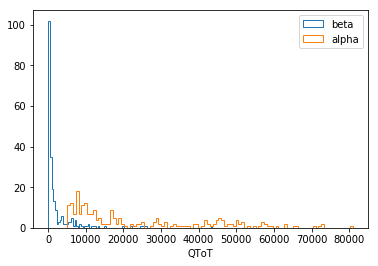

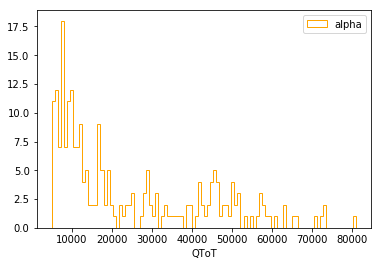

235


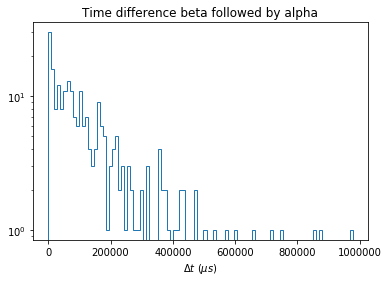

In [19]:
#Charge distributions
print(len(QToT_b_all),len(QToT_filtered_all))
plt.hist(QToT_b_all,bins=100,density=False,histtype='step',label='beta');
plt.hist(QToT_filtered_all,bins=100,density=False,histtype='step',label='alpha');
plt.legend()
plt.xlabel("QToT")
plt.show()


plt.hist(QToT_filtered_all,bins=100,density=False,histtype='step',label='alpha',color='orange');
plt.legend()
plt.xlabel("QToT")
plt.show()

print(len(time_b_a_all))
#Time distribution between beta and alpha
plt.hist(np.array(time_b_a_all)*1e-3,bins=100,density=False,histtype='step');
plt.xlabel("$\Delta t\ (\mu s) $ ");
plt.yscale('log')
plt.title('Time difference beta followed by alpha')
plt.show() 

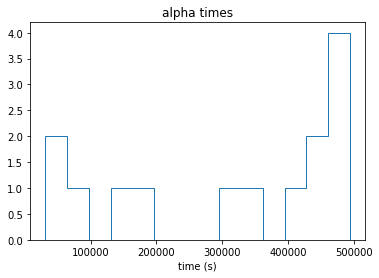

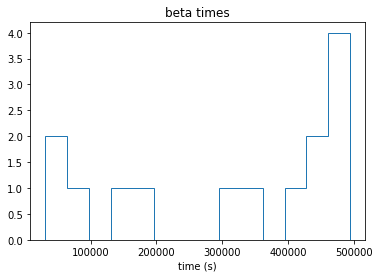

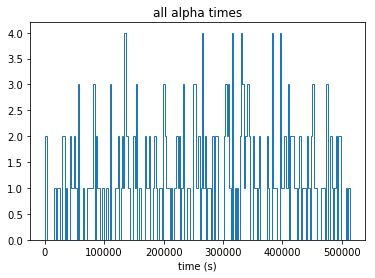

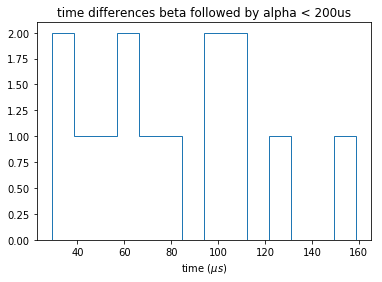

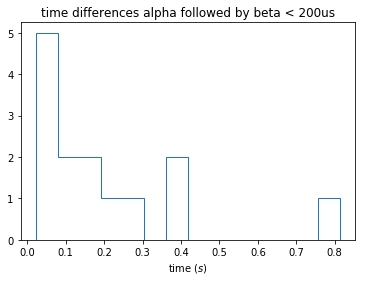

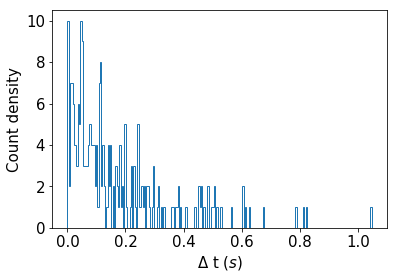

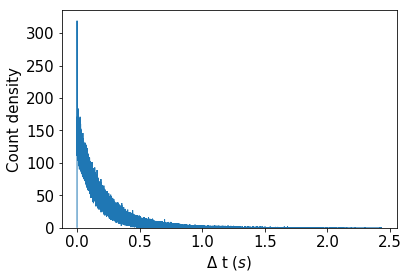

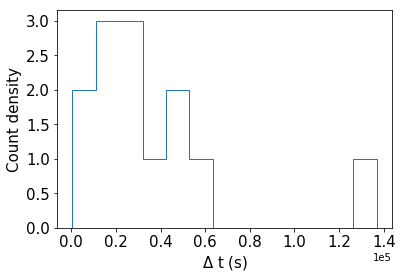

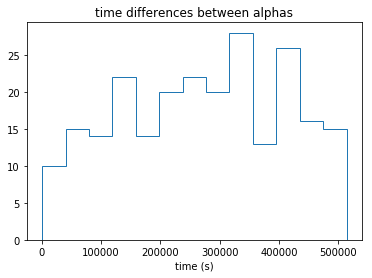

In [6]:
plt.hist(np.array(abstime_alpha_all)*1e-9,bins=len(abstime_alpha_all),histtype='step')
plt.xlabel('time (s)')
plt.title('alpha times')
plt.show()

plt.hist(np.array(abstime_beta_all)*1e-9,bins=len(abstime_alpha_all),histtype='step')
plt.xlabel('time (s)')
plt.title('beta times')
plt.show()


plt.hist(np.array(abstime_alpha_cut_all)*1e-9,bins=len(abstime_alpha_cut_all),histtype='step')
plt.xlabel('time (s)')
plt.title('all alpha times')
plt.show()


plt.hist((np.array(abstime_alpha_all)-np.array(abstime_beta_all))*1e-3,bins=len(abstime_alpha_all),histtype='step')
plt.xlabel('time ($\mu s$)')
plt.title('time differences beta followed by alpha < 200us')
plt.show()

plt.hist((np.array(abstime_beta2_all)-np.array(abstime_alpha_all))*1e-9,bins=len(abstime_alpha_all),histtype='step')
plt.xlabel('time ($s$)')
plt.title('time differences alpha followed by beta < 200us')
plt.show()

plt.hist(np.array(abstime_a_b_all)*1e-9,bins=len(abstime_a_b_all),histtype='step')
plt.xlabel('$\Delta$ t ($s$)',fontsize=15)
plt.ylabel('Count density',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('time differences alpha followed by beta')
plt.show()

plt.hist(np.array(time_bb_all)*1e-9,bins=len(time_bb_all)//10,histtype='step')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xlabel('$\Delta$ t ($s$)',fontsize=15)
plt.ylabel('Count density',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('time differences beta followed by beta')
plt.show()

plt.hist((np.array(abstime_alpha_all)[1:]-np.array(abstime_alpha_all)[:-1])*1e-9,
         bins=len(abstime_alpha_all)-1,histtype='step')
plt.xlabel('$\Delta$ t (s)',fontsize=15)
plt.ylabel('Count density',fontsize=15)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.title('time differences between alphas')
plt.show()


plt.hist(np.array(abstime_alpha_notimecut)*1e-9,
         bins=len(abstime_alpha_all)-1,histtype='step')
plt.xlabel('time (s)')
plt.title('time differences between alphas')
plt.show()

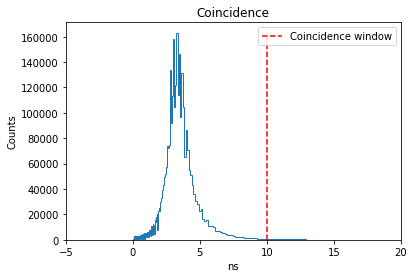

In [7]:
#Coincidence window
plt.hist(np.array(np.abs(dt_both_all)),bins=np.logspace(start=-np.log10(1000), stop=np.log10(1000), num=500),
         density=False,histtype='step');
plt.xlim(-5,20)
plt.title('Coincidence')
plt.xlabel('ns')
plt.ylabel('Counts')
plt.vlines(10,0,160000,linestyles='--',colors='r',label='Coincidence window')
plt.legend()
plt.show() 

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LogNorm

2.90463125e-05 0.01974024790625
48 25


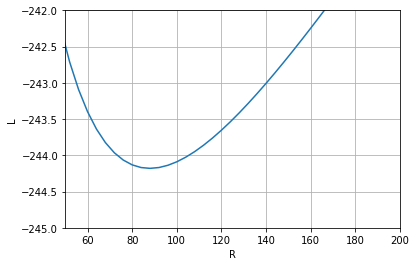

88.0


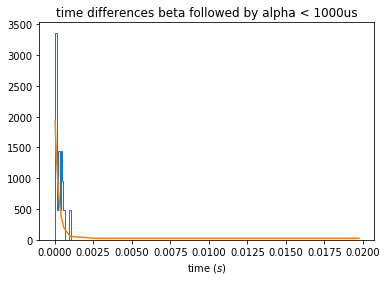

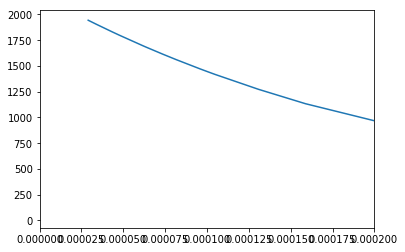

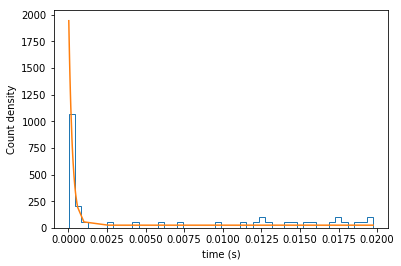

[]


In [9]:
%matplotlib inline
#Probability t given A,C,lambda (decay constant) -> C+Ae^-lambda*t
#Likelihood L = product P
#Minimise sum(-ln(L))
#Monte carlo markov chain
#Lnow -> Lnew then compare some parameter R between 0 and 1, R < Lnew/Lnow ->Lnew becomes Lnow and repeat

time_diff_ba_1ms = np.sort((np.array(abstime_alpha_1ms_all)-np.array(abstime_beta_1ms_all))*1e-9)
#print(time_diff_ba_1ms)
l = np.log(2)/(164*1e-6)
L_list = []

#tf =(np.array(time_b_a_all)*1e-9)[-1]
#ti =(np.array(time_b_a_all)*1e-9)[0]
tba = (np.sort(np.array(time_b_a_all))*1e-9)[np.sort(np.array(time_b_a_all))*1e-9<20e-3]
print(tba[0],tba[-1])
print(len(tba),len(time_diff_ba_1ms))

def P(t,R,l):
    N = 1/(t[-1]-R*np.exp(-l*t[-1])/l + R/l)
    return (1 + R*np.exp(-l*t))*N

L_old = -np.inf
R_min = np.nan

L_list = []
L_list_all = []

R_list = np.linspace(0,400,101)

for R in R_list:
    P_list = P(tba,R,l)
    L = np.prod(P_list)
        
    L_list.append(-np.log(L))
    if L > L_old:    
        L_old = L
        R_min = R    
    elif L == L_old:
        L_list_all += L

plt.plot(R_list,L_list)
plt.xlabel('R')
plt.ylabel('L')
plt.ylim(-245,-242)
plt.xlim(50,200)
plt.grid()
plt.show()

#print(time_diff_ba_1ms)
P_list = P(tba,R_min,l)

print(R_min)
#print(C_min*N,A_min*N)
#P_list = P(time_diff_ba_1ms,1,4,l)
plt.hist(tba,
         bins=len(time_diff_ba_1ms),range=(0,2000e-6),histtype='step',normed=1)
plt.plot(tba,P_list)
plt.xlabel('time ($s$)')
plt.title('time differences beta followed by alpha < 1000us')
#plt.xlim(0,1000e-6)
plt.show()

plt.plot(tba,P_list)
plt.xlim(0,200e-6)
plt.show()

plt.hist(tba,
         bins=len(tba),histtype='step',normed=1);
plt.plot(tba,P_list)
plt.ylabel('Count density')
plt.xlabel('time (s)')
#plt.xlim(0,1e-3)
plt.show()
print(L_list_all)    

In [10]:
%pylab
import shelve, os, sys, re
from scipy.optimize import curve_fit, minimize
from scipy.stats import poisson, truncnorm
import datetime
import pandas as pd
from pandas.plotting import scatter_matrix


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [11]:
def AllMeasNLL(t,R,th):
    l = np.log(2)/th
    P_list = P(t,R,l)
    L = np.prod(P_list)
    return -np.log(L)

def get_truncated_normal(mean=0, sd=1, low=0, upp=10, nsamp=1):
    return truncnorm((low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd).rvs(size=nsamp)

In [12]:
def MCMCsample(params, sigma_proposal, MeasTimes, Nsteps, tHalf, fixeddict, floating,
               range800=(660,1599), range1000=(100,660), range1500=(2.05,100),
               printfreq=30000):
    '''
    Implementation of Metropolis-Hastings sampling.
   
    Arguments
    ---------
   
    * params/sigma_proposal: dictionary of the fit parameters/their prior width.
    Params should start as a MLE, and priors are assumed normally distributed.
   
    * Nsteps: number of MCMC samples.
   
    * measspec*/binc*/smearsims*/*_trimmed: measured spec/bins/simulated/simulated (fitted only)
   
    * fixeddict: dictionary describing which isotopes need to be fixed to parent's activity.
   
    * floating: list of isotopes with non-exponential decay (from feeding).
   
    * Decay factors: exponential decay factors, since Dec measurement.

    * MeasNum: just a dictionary relating the month key to measurement number
    '''
    #First, set the seed using the process ID and time
    theseed = os.getpid() + time.time()
    np.random.seed(int(theseed))
   
    Params = {'InitialParams': params, 'Nsteps': Nsteps, 'sigma_proposal': sigma_proposal,
               'fixeddict': fixeddict, 'seed':theseed}
    
    #make space for output
    Trials = {key: np.empty(Nsteps, dtype=np.float64) for key in params if not key in floating}

    for isokey in floating:
        Trials[isokey] = np.empty((Nsteps, len(params[isokey])), dtype=np.float64)
    Trials['L_proposal'] = np.empty(Nsteps, dtype=np.float64)
    Trials['L_current'] = np.empty(Nsteps, dtype=np.float64)
    Trials['Accept'] = np.empty(Nsteps, dtype=bool)

    L_current = None

    starttime = time.time()
    print(starttime)
    for i in range(Nsteps):

        if not i%printfreq:
            print("Up to step {0}".format(i))
            print("Params: {0}".format(params))
        #Store this trial
        for key, value in params.items():
            Trials[key][i] = value

        #2. Calculate the likelihood of the current guess (usually set at end of loop)
        if L_current is None:
            L_current = -1*AllMeasNLL(MeasTimes,params['Ratio A/C'], tHalf)

        if not i%printfreq:
            print("L_current: {0}".format(L_current))

        #3. Propose the new step:
        newparams = {key: get_truncated_normal(mean=params[key], sd=sigma_proposal[key], low=1, upp=1000)
                     for key in params.keys() if not key in floating}
        for isokey in floating:
            newparams[isokey] = [get_truncated_normal(mean=val, sd=sigma_proposal[key], low=1, upp=1000)
                                 for val in params[isokey]]
       
        if not i%printfreq:
            print("newparams: {0}".format(newparams))

        #4. Calculate the likelihood for the new step
        L_proposal = -1*AllMeasNLL(MeasTimes,newparams['Ratio A/C'], tHalf)

        if not i%printfreq:
            print("L_proposal: {0}".format(L_proposal))

        #5. Do a Monte Carlo trial to see if we take the step.
        #Assumes params is already MAP.
        params = newparams if np.log(np.random.uniform()) < L_proposal-L_current else params

        #print(L_proposal, L_current)
        #print(Trials['L_current'][i])
        Trials['L_proposal'][i] = L_proposal
        Trials['L_current'][i] = L_current
    

        if params == newparams:
            Trials['Accept'][i] = True
            L_current = L_proposal
        else:
            Trials['Accept'][i] = False

    endtime = time.time()
    print("Finished after {0} seconds".format(endtime-starttime))
    return Trials, Params


24.627503900793425
[(2.90463125e-05, 0.9971814216609696), (3.37245e-05, 0.9971252988160851), (4.33245e-05, 0.9970066170449765), (4.7631437500000005e-05, 0.99695179623889), (6.195025e-05, 0.9967622426983814), (6.3371078125e-05, 0.9967428045357614), (7.35299375e-05, 0.9966003919614755), (8.1553375e-05, 0.9964835428055733), (9.5648640625e-05, 0.9962684939663596), (9.969501953125e-05, 0.9962043730517369), (0.0001036859375, 0.996140055981944), (0.0001047876875, 0.9961221098933133), (0.0001307316875, 0.9956746441566734), (0.0001588478125, 0.995131519942656), (0.00023298, 0.9933520255893292), (0.00025469831250000003, 0.9927175605363524), (0.00028757581250000004, 0.9916410079703659), (0.00031110081250000003, 0.9907752234529754), (0.00036894121875, 0.9882505732517181), (0.000409679125, 0.9860737112148391), (0.00042619341796875, 0.9850819801492099), (0.00046266075000000003, 0.9826391715922398), (0.00048560658593750004, 0.9809049198665295), (0.000551417984375, 0.9749348561979339), (0.00060787275,

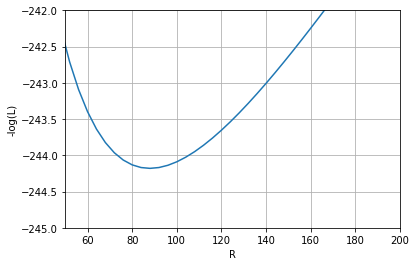

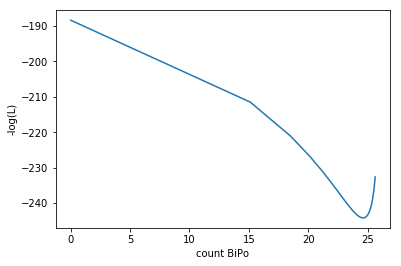

88.0


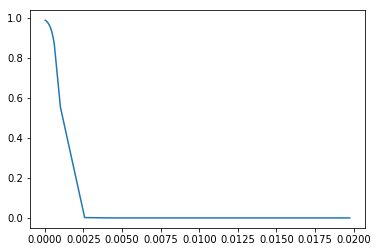

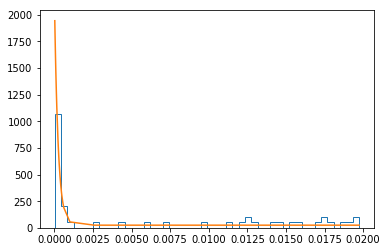

[]


In [15]:
%matplotlib inline
#PoBi decay 
def P_BiPo(t,R,l):
    return R*np.exp(-l*t)/(1 + R*np.exp(-l*t))
#P density distribution
def P(t,R,l):
    N = 1/(t[-1]-R*np.exp(-l*t[-1])/l + R/l)
    return (1 + R*np.exp(-l*t))*N

#Time distribution of Po-Bi decay to 1ms
time_diff_ba_1ms = np.sort((np.array(abstime_alpha_1ms_all)-np.array(abstime_beta_1ms_all))*1e-9)

l = np.log(2)/(164*1e-6)
L_list = []


tba = (np.sort(np.array(time_b_a_all))*1e-9)[np.sort(np.array(time_b_a_all))*1e-9<20e-3]



L_old = -np.inf
R_min = np.nan

L_list = []
L_list_all = []
count_BiPo = []

print(np.sum(P_BiPo(tba,88,l)))

R_list = np.linspace(0,400,101)

for R in R_list:
    P_list = P(tba,R,l)
    P_BiPo_list = P_BiPo(tba,R,l)
    count_BiPo.append(np.sum(P_BiPo_list))
    L = np.prod(P_list)
        
    L_list.append(-np.log(L))
    if L > L_old:    
        L_old = L
        R_min = R    
    elif L == L_old:
        L_list_all += L
print([i for i in zip(tba,P_BiPo_list)])    

plt.plot(R_list,L_list)
plt.xlabel('R')
plt.ylabel('-log(L)')
plt.ylim(-245,-242)
plt.xlim(50,200)
plt.grid()
plt.show()

plt.plot(count_BiPo,L_list)
plt.xlabel('count BiPo')
plt.ylabel('-log(L)')
plt.show()

#print(time_diff_ba_1ms)
P_list = P(tba,R_min,l)

print(R_min)

plt.plot(tba,P_BiPo(tba,R_min,l))
plt.show()

plt.hist(tba,
         bins=len(tba),histtype='step',normed=1);
plt.plot(tba,P_list)
#plt.xlim(0,1e-3)
plt.show()
print(L_list_all)    

1629594140.913216
Up to step 0
Params: {'Ratio A/C': 88.0}
L_current: 244.17983053306062
newparams: {'Ratio A/C': array([145.01160637])}
L_proposal: 242.82398107863142
Finished after 17.214702367782593 seconds
346187: Proportion accepted: 0.51725



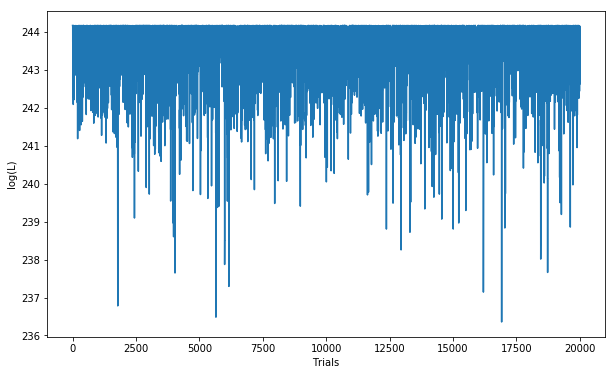

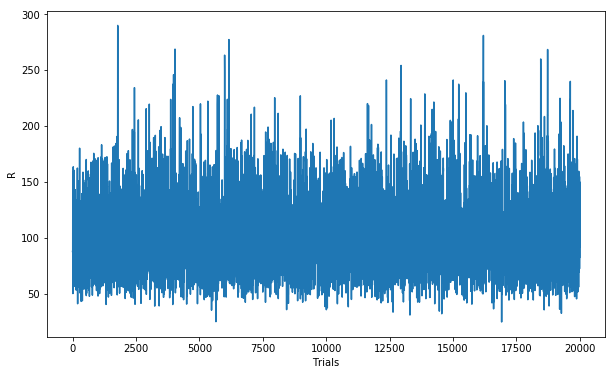

In [16]:
fig,ax=plt.subplots(figsize=(10,6))
fig2,ax2=plt.subplots(figsize=(10,6))
paramdict = {'Ratio A/C': R_min}
sigmadict = {'Ratio A/C': 60}
Ntrials = 20000


Trials, Params = MCMCsample(paramdict, sigmadict, tba, Ntrials, 164e-6, [], []);
ax.plot(Trials['L_current'])
ax2.plot(Trials['Ratio A/C'])

print(str(i)+': Proportion accepted: '+ str(sum(Trials['Accept'])/len(Trials['Accept'])) +'\n')
#ax2.set_xlim(0,100)    
ax.set_xlabel('Trials')
ax2.set_xlabel('Trials')
ax.set_ylabel('log(L)')
ax2.set_ylabel('R')
plt.show()

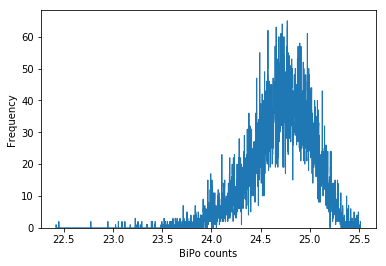

24.12607831228703 25.171171845713367


In [17]:
counts_MCMC = []
for R in Trials['Ratio A/C']:
    counts_MCMC.append(np.sum(P_BiPo(tba,R,l)))
    
plt.hist(counts_MCMC,histtype='step',bins=len(Trials['Ratio A/C'])//10);
plt.xlabel('BiPo counts')
plt.ylabel('Frequency')
plt.show()
print(np.percentile(counts_MCMC,5),np.percentile(counts_MCMC,95))

In [ ]:
#WfmInMemoryTrue
foldername = 'Radon'

fnamelist = [join(foldername,f) for f in sorted(listdir(foldername))
        if isfile(join(foldername, f)) if ('.to' in f)&(not 'npy' in f)&(not
        'shelf' in f)]
        
pixie2.make1PEtemplate(fnamelist,'singlePEtemplate_Radon.shelf', 
                       ToTcuts={0:(2,4),1:(2,4),2:(2,5),3:(2,4), 4:(2,4),5:(2,4),6:(2,4),7:(2,4),8:(2,4)},
                       resamplefactor=10, alignidx=(110,180), BLslice=slice(10,100), 
                       medianlen=21, highfreqcut=200, thresh=8, Nsamp_dig=500, debug=True)

In [ ]:
batch_pixie.procwfms('Radon', redoanal=True)

In [20]:
foldernames = [r'D:\Downloads\ANU\2021 Winter\SCNC2101\Test\Radon']
shelffiles = [os.path.join(foldername, os.path.splitext(f)[0])
             for foldername in foldernames 
              for f in sorted(listdir(foldername))
             if os.path.isfile(os.path.join(foldername, f))
             if 'shelf.bak' in f]
shelf_keys = [os.path.splitext(item)[0] for item in shelffiles]
analysisdict_wfm = shelve.open(shelffiles[0])['anal']
print(dir(analysisdict_wfm))

['BL', 'BLslice', 'BeamCh', 'CFD', 'CFDBaF2', 'CFDBeam', 'CFDkwargs', 'Nread', 'Nsamp', 'Ntrigs', 'Nwfms', 'NwfmsPerChunk', 'PEtemplate', 'PEtemplatekwargs', 'QToT', 'Qf', 'Qkwargs', 'Qt', 'ToT', 'ToTkwargs', 'WfmsInMemory', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'abstime', 'abstimeBaF2', 'abstimeBeam', 'arrayify', 'ch', 'chunkall', 'coinclvl', 'coincmask', 'coincsuffix', 'crapCFDkwargs', 'downscalefactor', 'extramask', 'filtwfm', 'fnamelist', 'goodCFD', 'idlecpus', 'ncoinc', 'parallel', 'procChunk', 'secondlevelcuts', 'self', 'storewfmproc', 'templatefile', 'timingmask', 'wfiltkwargs', 'wfm', 'writerets']


167.39071927380198


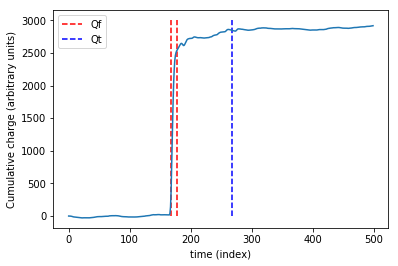

{'fastint': 10, 'totint': 100}


In [21]:
#Cumulative charge distribution for 1 waveform
print(analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][8])
f = analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][8] + analysisdict_wfm.Qkwargs['fastint']
t = analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][8] + analysisdict_wfm.Qkwargs['totint']
plt.plot(np.array(range(len(analysisdict_wfm.wfm['Radon\\Radon-000.evt.to'][8]))),
               np.cumsum(analysisdict_wfm.wfm['Radon\\Radon-000.evt.to'][8]))
plt.vlines(analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][8],0,3000,linestyles='--',colors='r')
plt.vlines(f,0,3000,linestyles='--',colors='r',label='Qf')
plt.vlines(t,0,3000,linestyles='--',colors='b',label='Qt')
plt.legend()
plt.xlabel('time (index)')
plt.ylabel('Cumulative charge (arbitrary units)')
plt.show()
print(analysisdict_wfm.Qkwargs)


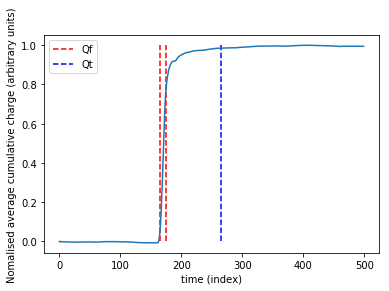

{'fastint': 10, 'totint': 100}


In [22]:
#Cumulative charge distributions for 100 waveforms
f = 0
t = 0
w = 0
c = 0
for i in range(100):
    f += analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][i] + analysisdict_wfm.Qkwargs['fastint']
    t += analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][i] + analysisdict_wfm.Qkwargs['totint']
    c += np.cumsum(analysisdict_wfm.wfm['Radon\\Radon-000.evt.to'][i])
    w += analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][i]

f = f/100
t = t/100
w = w/100
c = c/100
    
plt.plot(np.array(range(len(analysisdict_wfm.wfm['Radon\\Radon-000.evt.to'][i]))),
               c/np.max(c))
plt.vlines(w,0,1,linestyles='--',colors='r')
plt.vlines(f,0,1,linestyles='--',colors='r',label='Qf')
plt.vlines(t,0,1,linestyles='--',colors='b',label='Qt')
plt.legend()
plt.xlabel('time (index)')
plt.ylabel('Nomalised average cumulative charge (arbitrary units)')

plt.show()

print(analysisdict_wfm.Qkwargs)

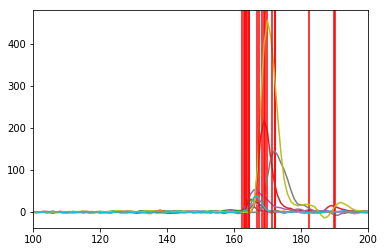

In [23]:
#CFD trigger times
for i in range(len(analysisdict_wfm.wfm['Radon\\Radon-000.evt.to'])//1000):
    
    plt.plot(analysisdict_wfm.wfm['Radon\\Radon-000.evt.to'][i])
    plt.axvline(analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][i], color='r')
    plt.axvline(analysisdict_wfm.CFD['Radon\\Radon-000.evt.to'][i]\
            +pixie2.doToT(analysisdict_wfm.wfm['Radon\\Radon-000.evt.to'], thresh=4, extendby=2)[0][i], color='r')
plt.xlim(100,200)
plt.show()


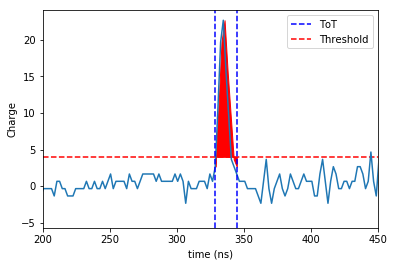

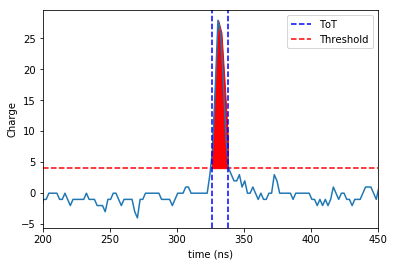

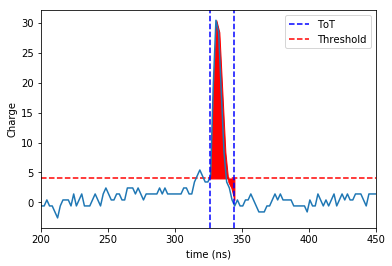

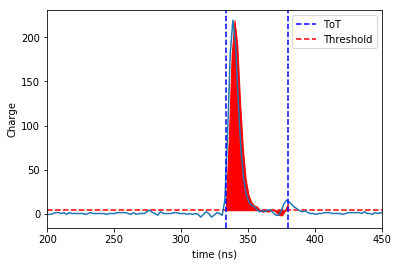

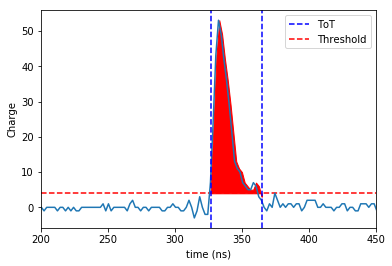

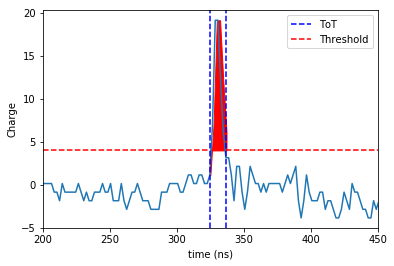

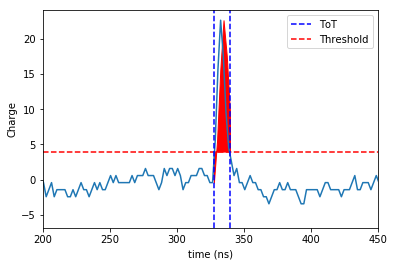

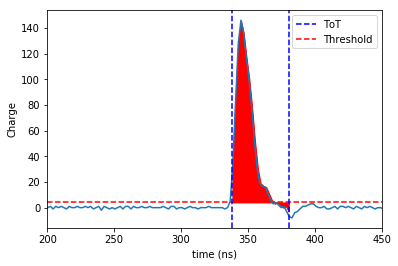

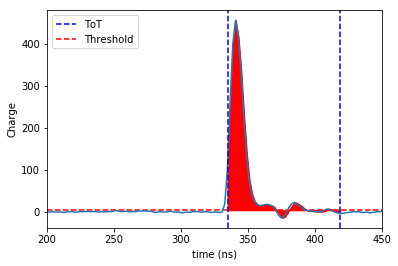

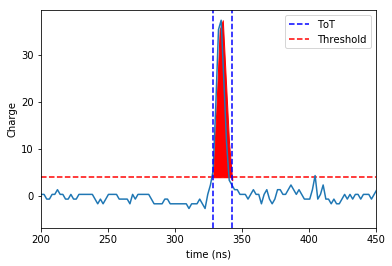

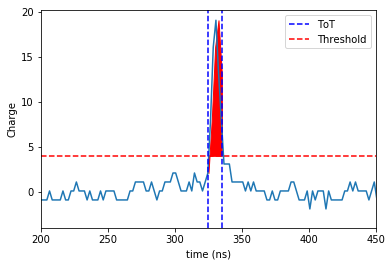

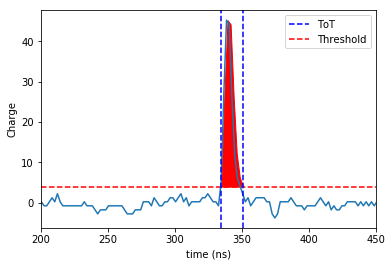

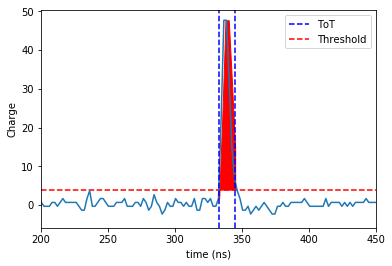

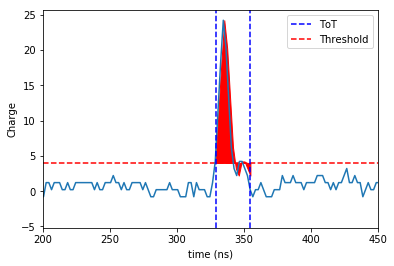

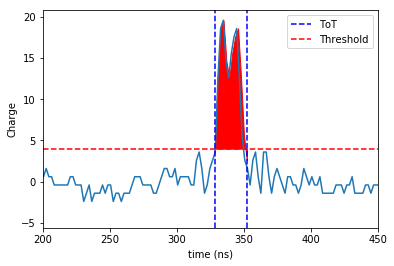

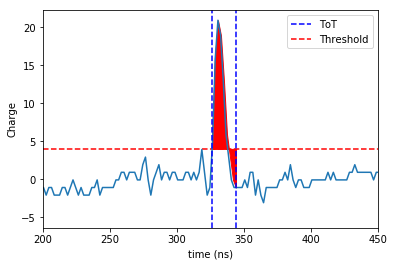

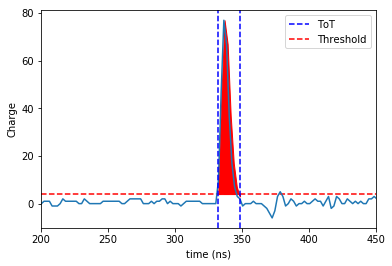

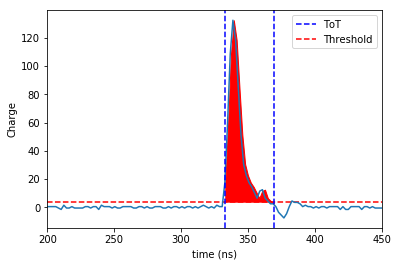

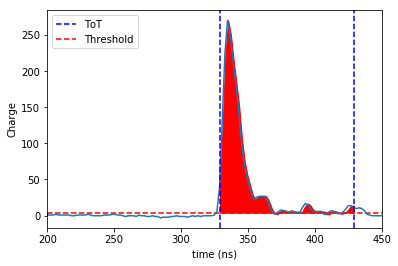

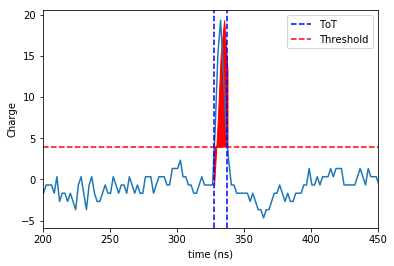

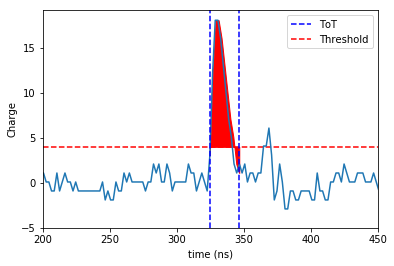

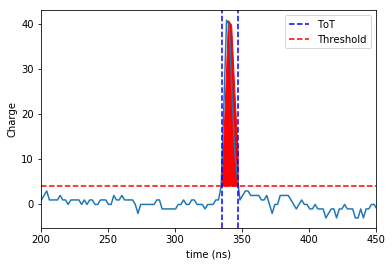

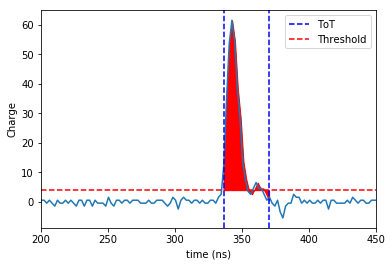

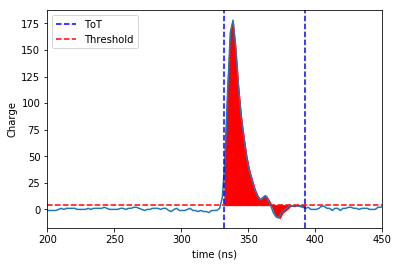

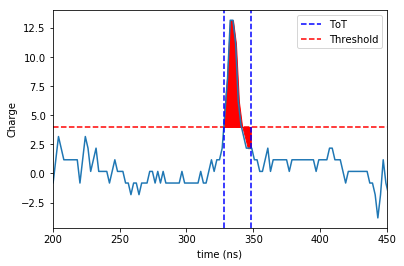

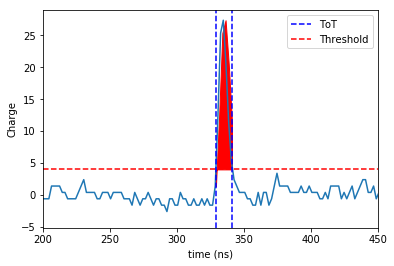

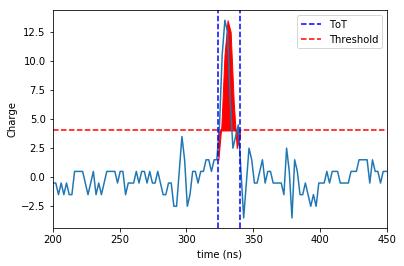

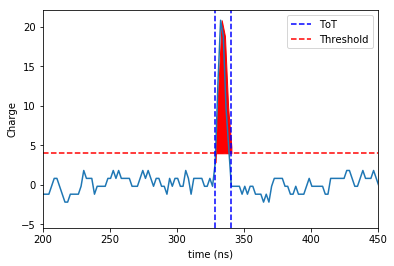

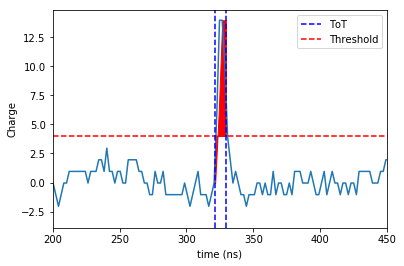

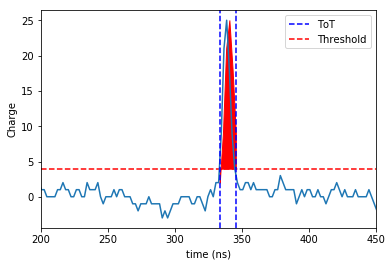

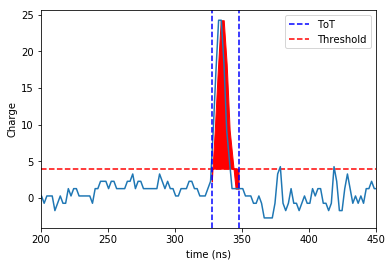

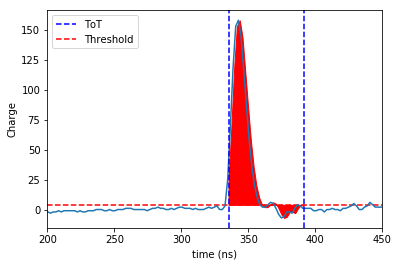

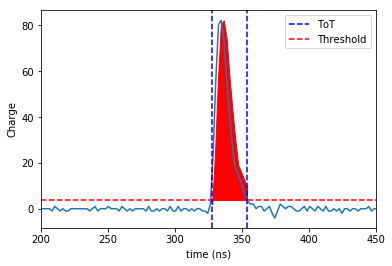

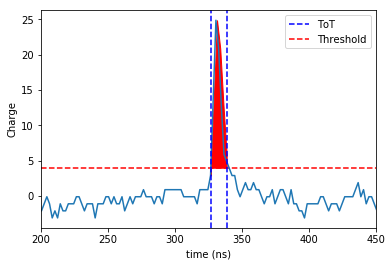

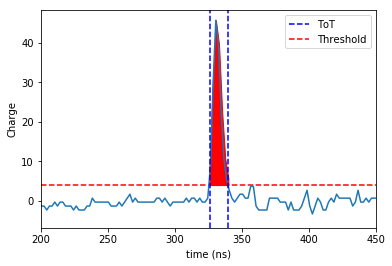

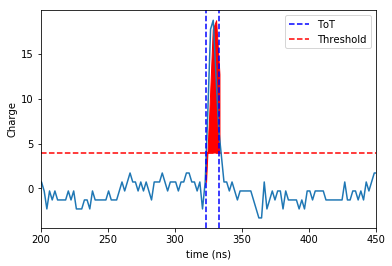

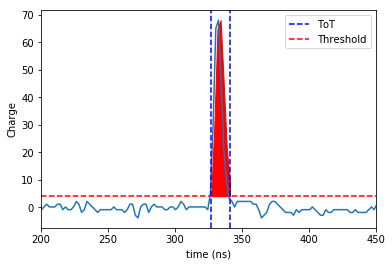

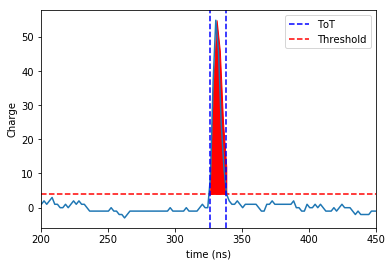

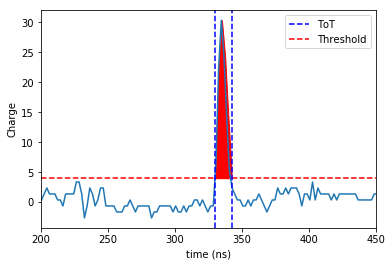

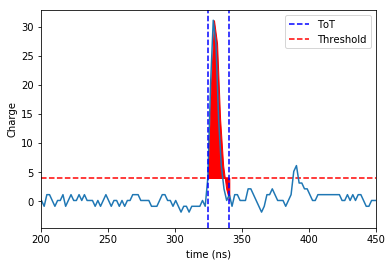

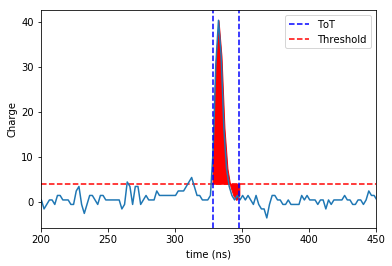

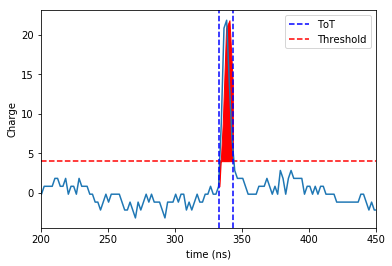

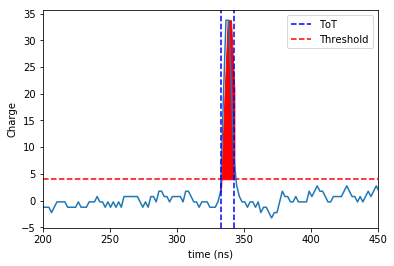

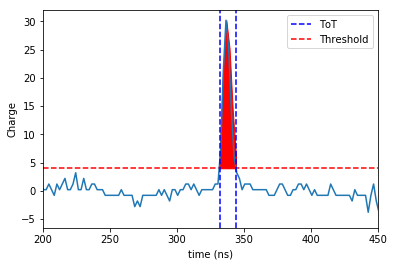

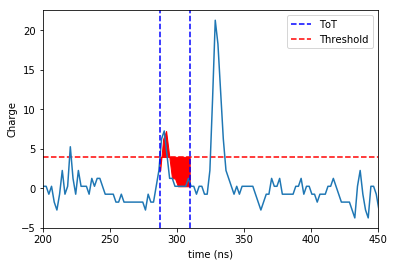

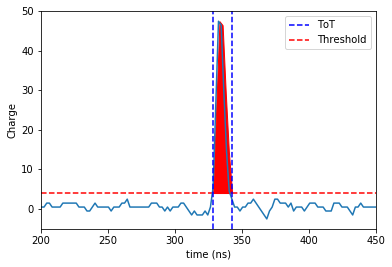

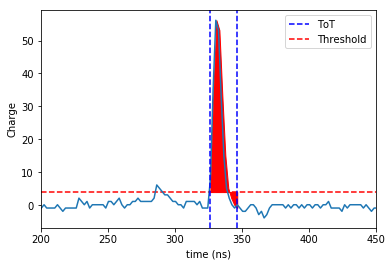

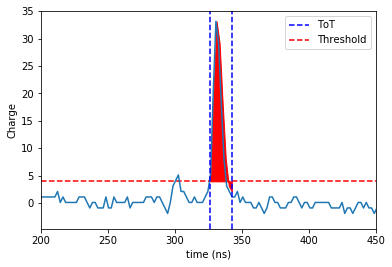

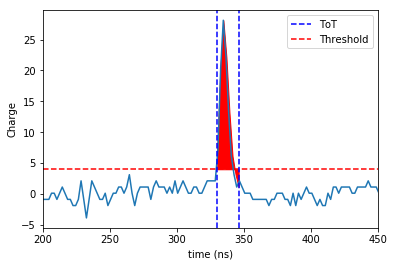

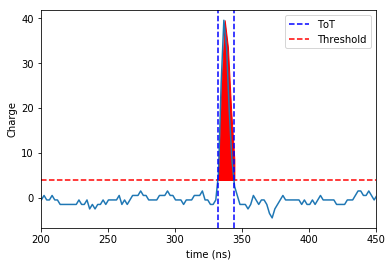

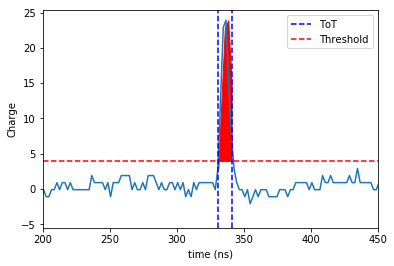

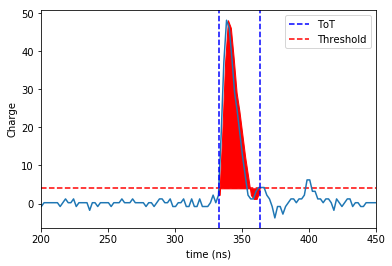

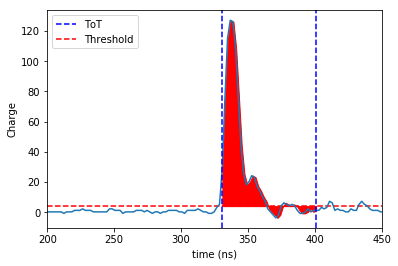

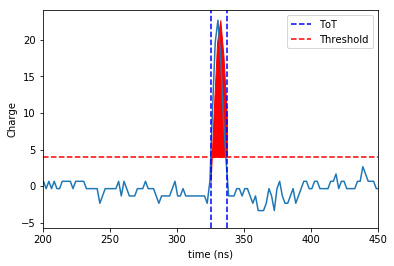

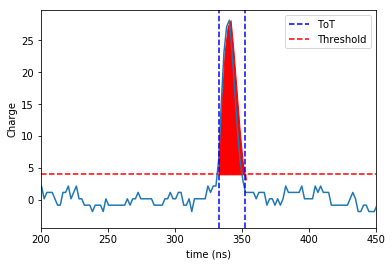

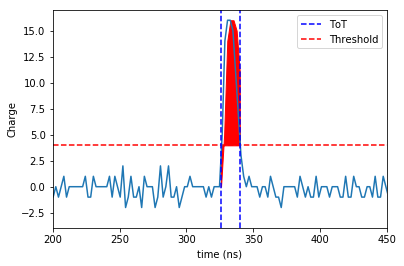

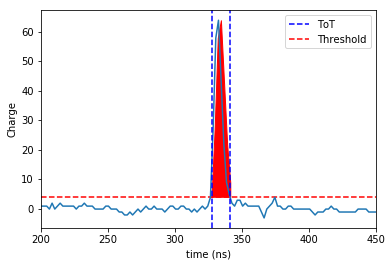

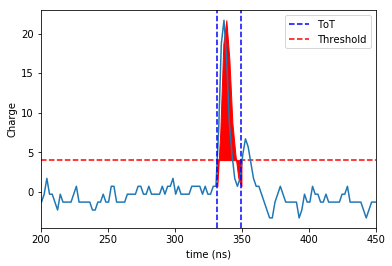

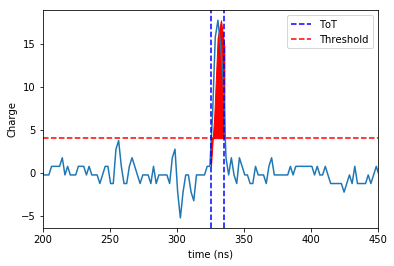

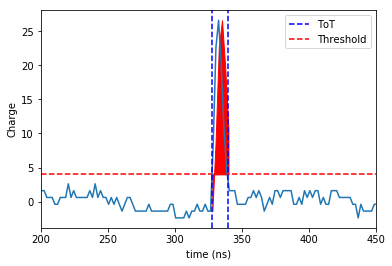

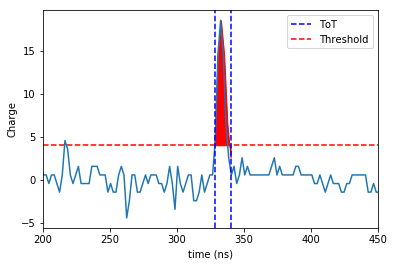

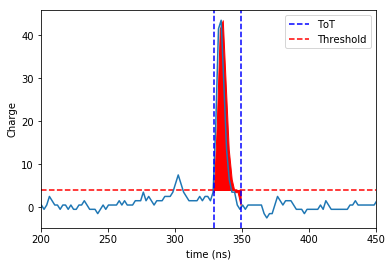

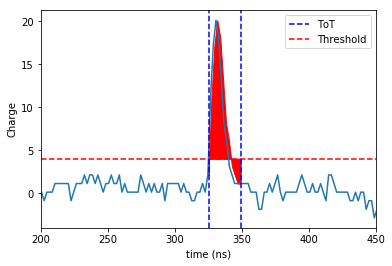

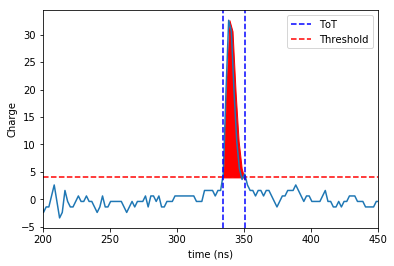

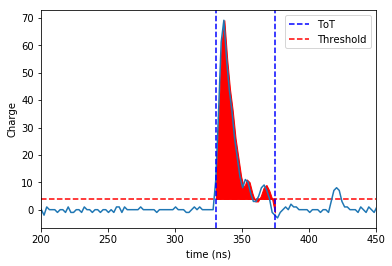

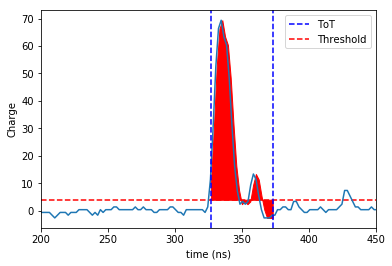

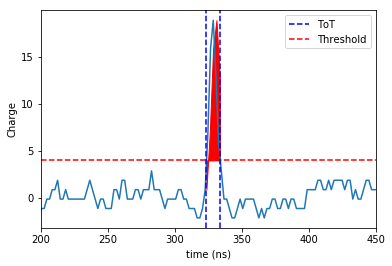

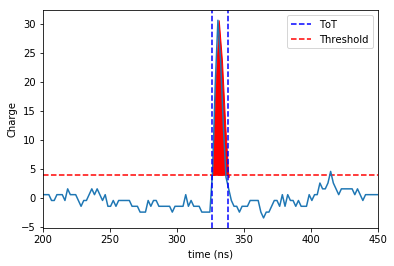

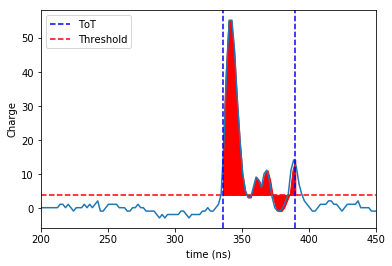

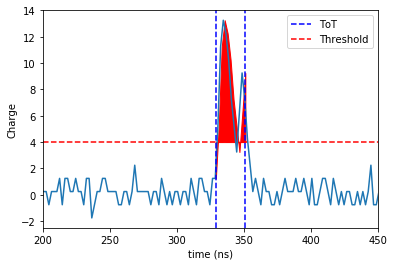

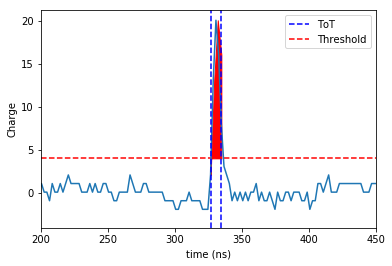

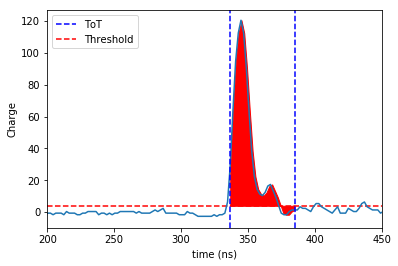

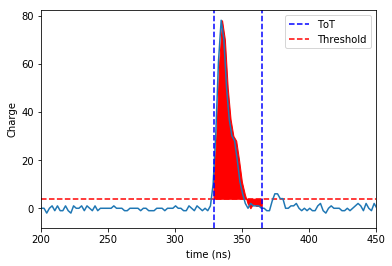

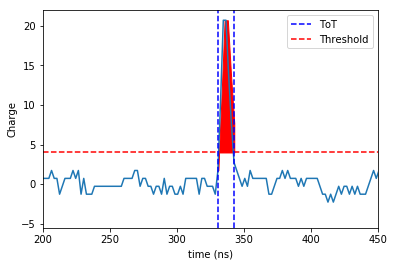

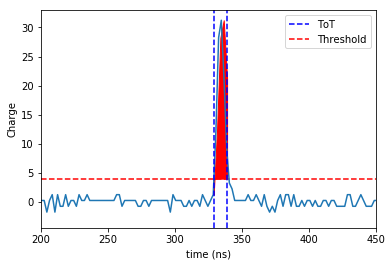

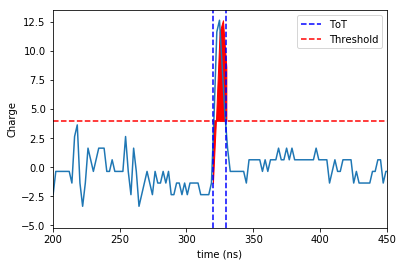

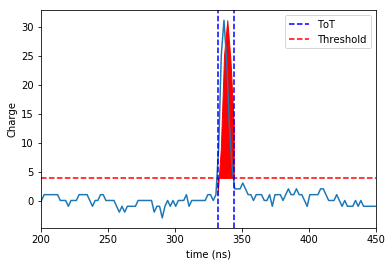

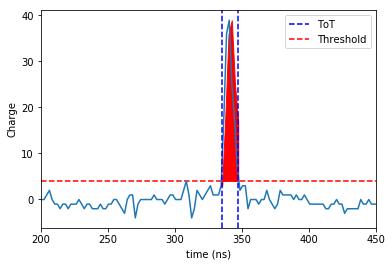

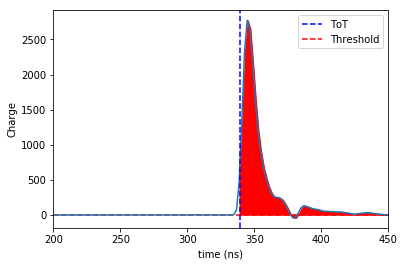

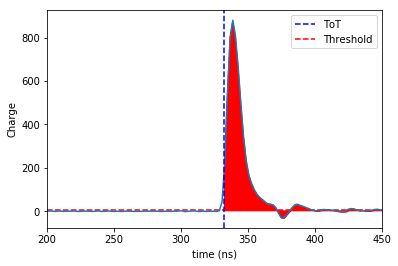

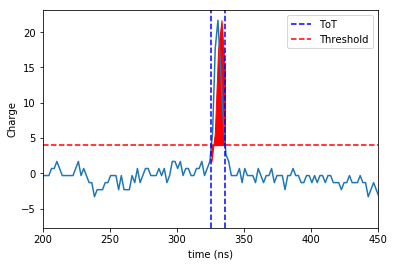

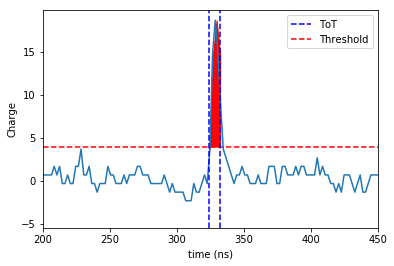

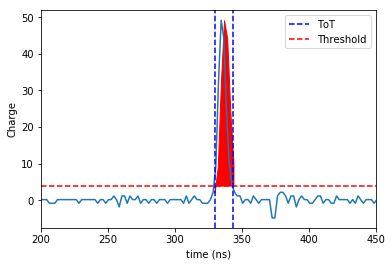

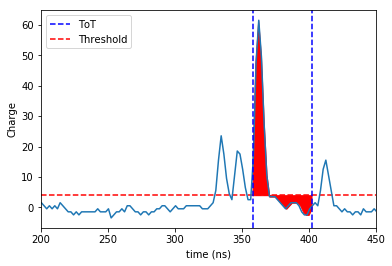

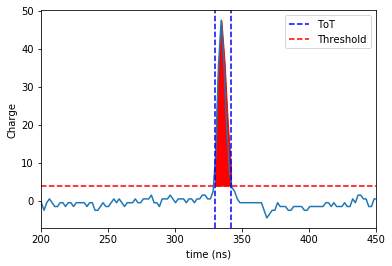

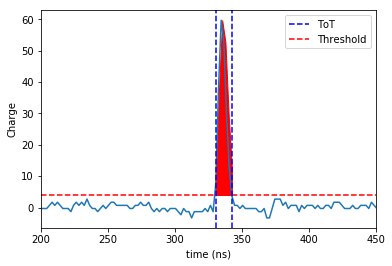

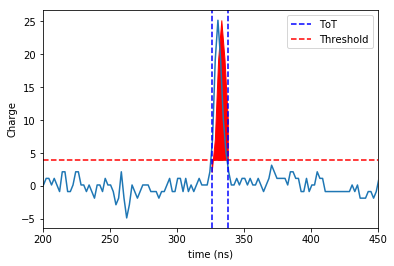

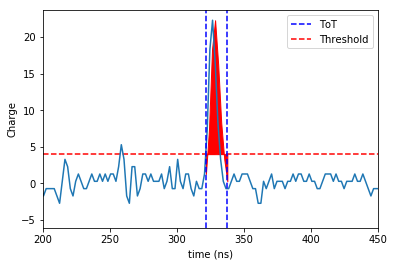

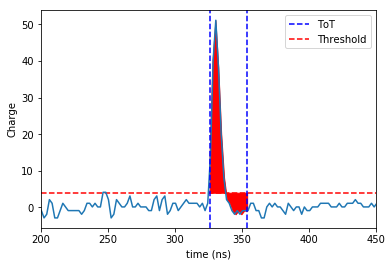

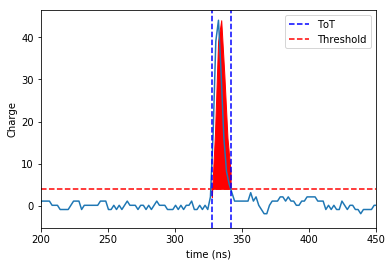

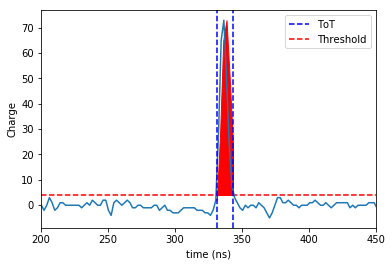

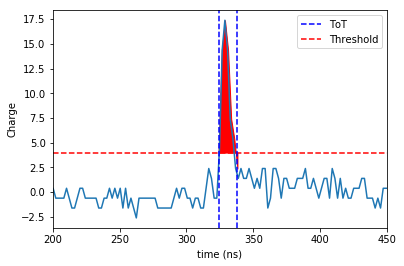

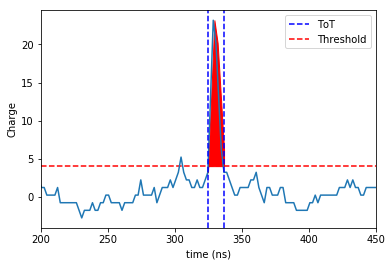

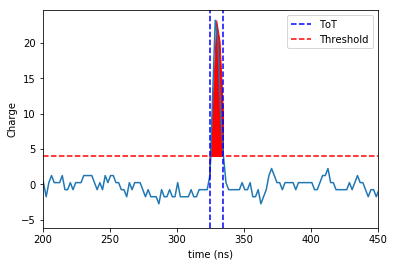

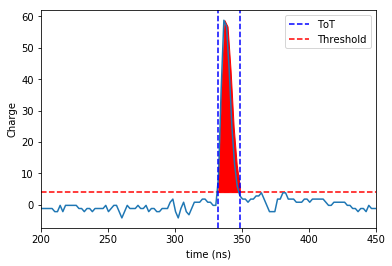

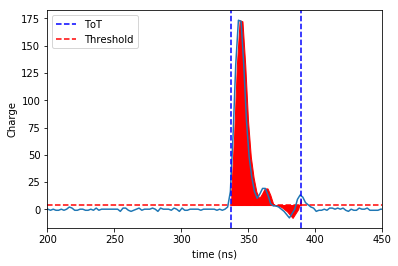

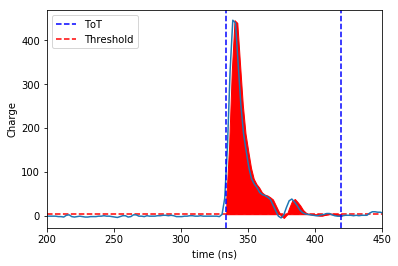

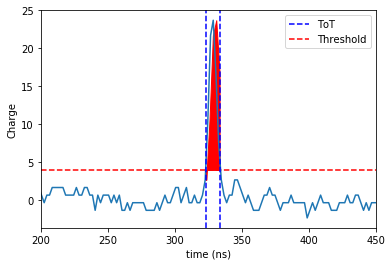

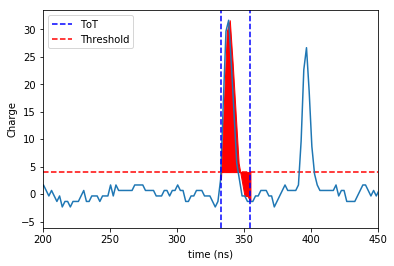

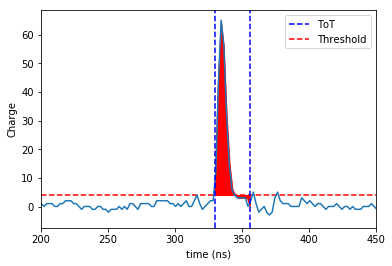

In [24]:
#Charge over threshold
filename = 'Radon\\Radon-000.evt.to'
thr = 4
time_ns = np.linspace(0,1000,len(analysisdict_wfm.wfm[filename][0]))

for i in range(len(analysisdict_wfm.wfm[filename])//100):
    lb = 2*analysisdict_wfm.CFD[filename][i]
    ub = 2*analysisdict_wfm.CFD[filename][i]\
        +2*pixie2.doToT(analysisdict_wfm.wfm[filename], thresh=thr, extendby=2)[0][i]
    wfm = analysisdict_wfm.wfm[filename][i]
    
    plt.plot(time_ns,wfm)
    plt.axvline(lb, color='b',linestyle='--')
    plt.axvline(ub, color='b',linestyle='--',label='ToT')

    plt.fill_between(np.linspace(lb,ub,len(wfm[int(len(wfm)*lb//1000):int(len(wfm)*ub//1000)])),
                     wfm[int(len(wfm)*lb//1000):int(len(wfm)*ub//1000)],thr,color='r',alpha=1)
    plt.hlines(thr,200,450,linestyles='--',colors='r',label='Threshold')
    plt.ylabel("Charge")
    plt.xlabel("time (ns)")
    plt.legend()
    plt.xlim(200,450)
    plt.show()
